In [1]:
import numpy as np
import pandas as pd

In [2]:
df= pd.read_csv("C:\\Users\\user\\Downloads\\Global Power Plant.csv")

In [3]:
df.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN


In [4]:
df.shape

(907, 27)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   907 non-null    object 
 1   country_long              907 non-null    object 
 2   name                      907 non-null    object 
 3   gppd_idnr                 907 non-null    object 
 4   capacity_mw               907 non-null    float64
 5   latitude                  861 non-null    float64
 6   longitude                 861 non-null    float64
 7   primary_fuel              907 non-null    object 
 8   other_fuel1               198 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        527 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    907 non-null    object 
 14  url       

In [6]:
df.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 906
other_fuel3                 907
commissioning_year          380
owner                       565
source                        0
url                           0
geolocation_source           19
wepp_id                     907
year_of_capacity_data       388
generation_gwh_2013         907
generation_gwh_2014         509
generation_gwh_2015         485
generation_gwh_2016         473
generation_gwh_2017         467
generation_gwh_2018         459
generation_gwh_2019         907
generation_data_source      458
estimated_generation_gwh    907
dtype: int64

In [7]:
(df.isnull().sum() /len(df)) *100

country                       0.000000
country_long                  0.000000
name                          0.000000
gppd_idnr                     0.000000
capacity_mw                   0.000000
latitude                      5.071665
longitude                     5.071665
primary_fuel                  0.000000
other_fuel1                  78.169791
other_fuel2                  99.889746
other_fuel3                 100.000000
commissioning_year           41.896362
owner                        62.293275
source                        0.000000
url                           0.000000
geolocation_source            2.094818
wepp_id                     100.000000
year_of_capacity_data        42.778390
generation_gwh_2013         100.000000
generation_gwh_2014          56.119074
generation_gwh_2015          53.472988
generation_gwh_2016          52.149945
generation_gwh_2017          51.488423
generation_gwh_2018          50.606395
generation_gwh_2019         100.000000
generation_data_source   

In [8]:
missing_df = pd.DataFrame({'Column': df.columns, 'Missing Percentage': (df.isnull().sum() /len(df)) *100})
print(missing_df)

                                            Column  Missing Percentage
country                                    country            0.000000
country_long                          country_long            0.000000
name                                          name            0.000000
gppd_idnr                                gppd_idnr            0.000000
capacity_mw                            capacity_mw            0.000000
latitude                                  latitude            5.071665
longitude                                longitude            5.071665
primary_fuel                          primary_fuel            0.000000
other_fuel1                            other_fuel1           78.169791
other_fuel2                            other_fuel2           99.889746
other_fuel3                            other_fuel3          100.000000
commissioning_year              commissioning_year           41.896362
owner                                        owner           62.293275
source

In [9]:
df = df.drop(columns = ['estimated_generation_gwh','generation_gwh_2019','generation_gwh_2013','wepp_id','other_fuel3','other_fuel2'])

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country                 907 non-null    object 
 1   country_long            907 non-null    object 
 2   name                    907 non-null    object 
 3   gppd_idnr               907 non-null    object 
 4   capacity_mw             907 non-null    float64
 5   latitude                861 non-null    float64
 6   longitude               861 non-null    float64
 7   primary_fuel            907 non-null    object 
 8   other_fuel1             198 non-null    object 
 9   commissioning_year      527 non-null    float64
 10  owner                   342 non-null    object 
 11  source                  907 non-null    object 
 12  url                     907 non-null    object 
 13  geolocation_source      888 non-null    object 
 14  year_of_capacity_data   519 non-null    fl

In [11]:
df.describe()

,capacity_mw,latitude,longitude,commissioning_year,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
count,907.000000,861.000000,861.000000,527.000000,519.0,398.000000,422.000000,434.000000,440.000000,448.000000
mean,326.223755,21.197918,77.464907,1997.091082,2019.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
std,590.085456,6.239612,4.939316,17.082868,0.0,4026.440035,4194.596959,4162.884308,4196.991169,4314.880456
min,0.000000,8.168900,68.644700,1927.000000,2019.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16.725000,16.773900,74.256200,1988.000000,2019.0,223.557672,176.381062,188.285252,177.874930,193.378250
50%,59.200000,21.780000,76.719500,2001.000000,2019.0,801.123775,711.181225,737.205450,817.977250,751.644375
75%,385.250000,25.512400,79.440800,2012.000000,2019.0,3035.306250,3084.121250,3282.861313,3275.690475,3143.535900
max,4760.000000,34.649000,95.408000,2018.000000,2019.0,28127.000000,30539.000000,30015.000000,35116.000000,35136.000000


In [12]:
df.duplicated().sum()

0

In [13]:
df = df.fillna(df.mean())

C:\Users\user\AppData\Local\Temp\ipykernel_10584\114435927.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df = df.fillna(df.mean())


In [14]:
df = df.fillna('Unknown')

In [15]:
df.isnull().sum()

country                   0
country_long              0
name                      0
gppd_idnr                 0
capacity_mw               0
latitude                  0
longitude                 0
primary_fuel              0
other_fuel1               0
commissioning_year        0
owner                     0
source                    0
url                       0
geolocation_source        0
year_of_capacity_data     0
generation_gwh_2014       0
generation_gwh_2015       0
generation_gwh_2016       0
generation_gwh_2017       0
generation_gwh_2018       0
generation_data_source    0
dtype: int64

In [16]:
df.corr()

C:\Users\user\AppData\Local\Temp\ipykernel_10584\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,capacity_mw,latitude,longitude,commissioning_year,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
capacity_mw,1.000000,0.050984,0.195882,0.274292,NaN,0.694350,0.711190,0.742221,0.757585,0.773456
latitude,0.050984,1.000000,0.036362,0.102069,NaN,0.044321,0.036398,0.031256,0.031212,0.031326
longitude,0.195882,0.036362,1.000000,0.092331,NaN,0.011472,0.018818,0.039209,0.039675,0.037780
commissioning_year,0.274292,0.102069,0.092331,1.000000,NaN,0.133051,0.147338,0.170644,0.170863,0.174377
year_of_capacity_data,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
generation_gwh_2014,0.694350,0.044321,0.011472,0.133051,NaN,1.000000,0.953594,0.925874,0.891687,0.884956
generation_gwh_2015,0.711190,0.036398,0.018818,0.147338,NaN,0.953594,1.000000,0.968888,0.928242,0.923461
generation_gwh_2016,0.742221,0.031256,0.039209,0.170644,NaN,0.925874,0.968888,1.000000,0.964649,0.957159
generation_gwh_2017,0.757585,0.031212,0.039675,0.170863,NaN,0.891687,0.928242,0.964649,1.000000,0.982689
generation_gwh_2018,0.773456,0.031326,0.037780,0.174377,NaN,0.884956,0.923461,0.957159,0.982689,1.000000


In [17]:
# 1) Primary Fuel    2) capacity_mw 
df

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,...,source,url,geolocation_source,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,Unknown,2011.000000,...,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,2019.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,Unknown
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,Unknown,1997.091082,...,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI,2019.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,Unknown
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,Unknown,1997.091082,...,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI,2019.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,Unknown
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,Unknown,2004.000000,...,Central Electricity Authority,http://www.cea.nic.in/,WRI,2019.0,617.789264,843.747000,886.004428,663.774500,626.239128,Central Electricity Authority
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,2015.000000,...,Central Electricity Authority,http://www.cea.nic.in/,WRI,2019.0,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,Central Electricity Authority
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,2016.000000,...,Central Electricity Authority,http://www.cea.nic.in/,WRI,2019.0,2431.823590,0.994875,233.596650,865.400000,686.500000,Central Electricity Authority
903,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,Unknown,1997.091082,...,Karnataka Power Corporation Limited,http://karnatakapower.com,Industry About,2019.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,Unknown
904,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,Unknown,1997.091082,...,CDM,https://cdm.unfccc.int/Projects/DB/TUEV-RHEIN1...,WRI,2019.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,Unknown
905,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,Unknown,1997.091082,...,Hindustan Zinc ltd,http://www.hzlindia.com/,WRI,2019.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,Unknown


In [18]:
from sklearn.preprocessing import LabelEncoder , OrdinalEncoder
lb = LabelEncoder()

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country                 907 non-null    object 
 1   country_long            907 non-null    object 
 2   name                    907 non-null    object 
 3   gppd_idnr               907 non-null    object 
 4   capacity_mw             907 non-null    float64
 5   latitude                907 non-null    float64
 6   longitude               907 non-null    float64
 7   primary_fuel            907 non-null    object 
 8   other_fuel1             907 non-null    object 
 9   commissioning_year      907 non-null    float64
 10  owner                   907 non-null    object 
 11  source                  907 non-null    object 
 12  url                     907 non-null    object 
 13  geolocation_source      907 non-null    object 
 14  year_of_capacity_data   907 non-null    fl

In [20]:
df['country'] = lb.fit_transform(df['country'])
df['country_long'] = lb.fit_transform(df['country_long'])
df['name'] = lb.fit_transform(df['name'])
df['gppd_idnr'] = lb.fit_transform(df['gppd_idnr'])
# df['primary_fuel'] = lb.fit_transform(df['primary_fuel'])
df['other_fuel1'] = lb.fit_transform(df['other_fuel1'])
df['owner'] = lb.fit_transform(df['owner'])
df['source'] = lb.fit_transform(df['source'])
df['url'] = lb.fit_transform(df['url'])
df['geolocation_source'] = lb.fit_transform(df['geolocation_source'])
df['generation_data_source'] = lb.fit_transform(df['generation_data_source'])

In [22]:
df['primary_fuel'].value_counts()

Coal       258
Hydro      251
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         20
Nuclear      9
Name: primary_fuel, dtype: int64

In [23]:
oe = OrdinalEncoder(categories = [['Coal','Hydro','Solar','Wind','Gas','Biomass','Oil','Nuclear']])
df['primary_fuel'] = oe.fit_transform(df[['primary_fuel']])

In [24]:
df

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,...,source,url,geolocation_source,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source
0,0,0,0,657,2.5,28.1839,73.2407,2.0,3,2011.000000,...,109,128,1,2019.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,1
1,0,0,1,519,98.0,24.7663,74.6090,0.0,3,1997.091082,...,174,173,3,2019.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,1
2,0,0,2,853,39.2,21.9038,69.3732,3.0,3,1997.091082,...,21,205,3,2019.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,1
3,0,0,3,0,135.0,23.8712,91.3602,4.0,3,2004.000000,...,22,58,3,2019.0,617.789264,843.747000,886.004428,663.774500,626.239128,0
4,0,0,4,1,1800.0,21.9603,82.4091,0.0,2,2015.000000,...,22,58,3,2019.0,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,0,0,902,491,1600.0,16.2949,77.3568,0.0,2,2016.000000,...,22,58,3,2019.0,2431.823590,0.994875,233.596650,865.400000,686.500000,0
903,0,0,903,822,3.0,12.8932,78.1654,2.0,3,1997.091082,...,77,22,0,2019.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,1
904,0,0,904,891,25.5,15.2758,75.5811,3.0,3,1997.091082,...,21,260,3,2019.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,1
905,0,0,905,539,80.0,24.3500,73.7477,0.0,3,1997.091082,...,59,82,3,2019.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,1


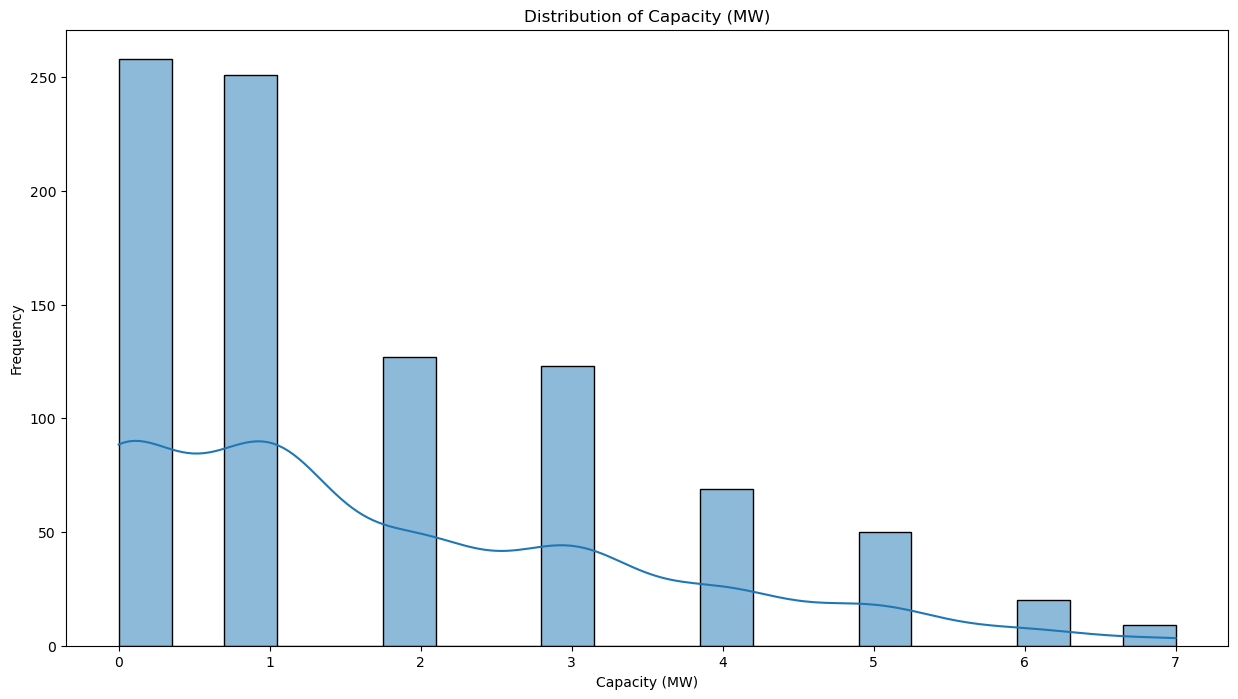

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 8))
sns.histplot(df['primary_fuel'], bins=20, kde=True)
plt.title('Distribution of Capacity (MW)')
plt.xlabel('Capacity (MW)')
plt.ylabel('Frequency')
plt.show()

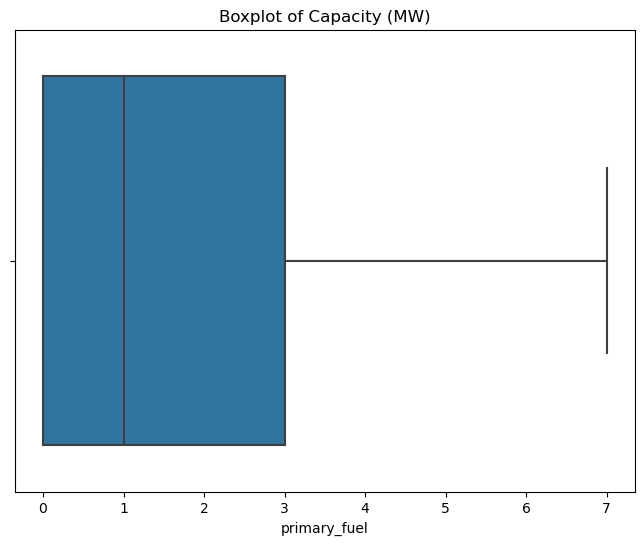

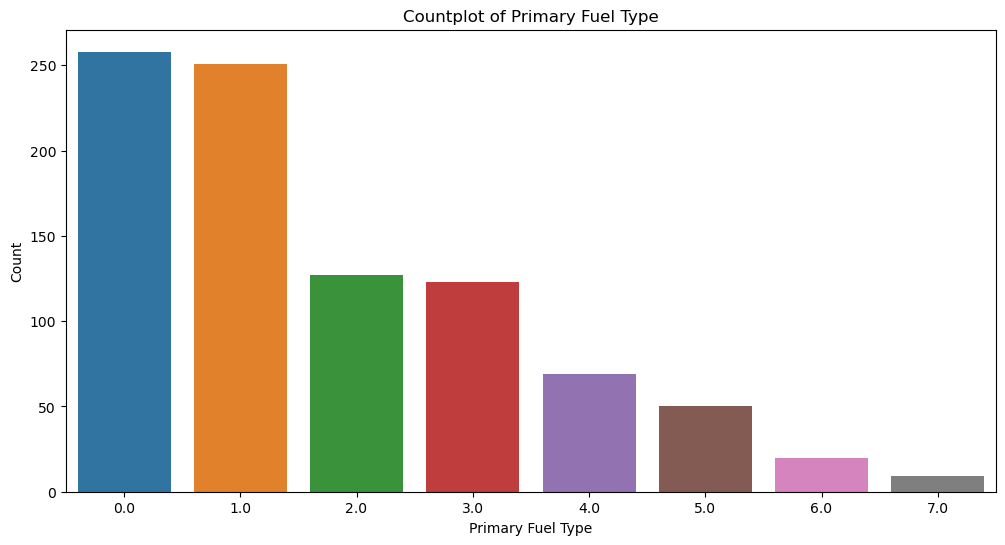

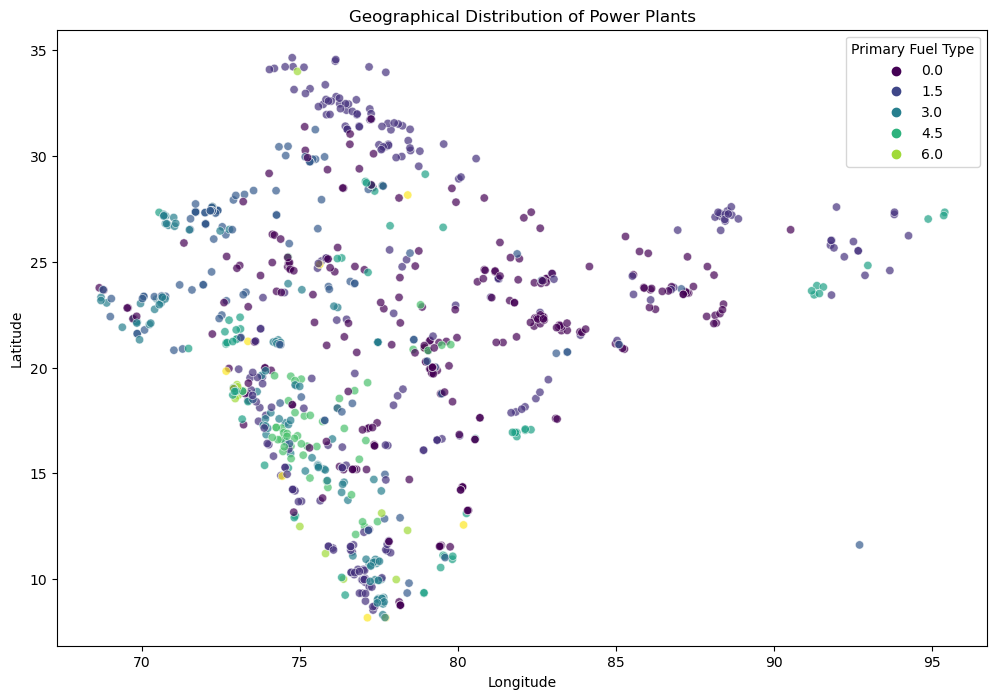

In [29]:
# Boxplot for capacity_mw
plt.figure(figsize=(8, 6))
sns.boxplot(x='primary_fuel', data=df)
plt.title('Boxplot of Capacity (MW)')
plt.show()

# Countplot for primary_fuel
plt.figure(figsize=(12, 6))
sns.countplot(x='primary_fuel', data=df)
plt.title('Countplot of Primary Fuel Type')
plt.xlabel('Primary Fuel Type')
plt.ylabel('Count')
plt.show()

# Scatter plot of latitude vs. longitude
plt.figure(figsize=(12, 8))
sns.scatterplot(x='longitude', y='latitude', data=df, hue='primary_fuel', palette='viridis', alpha=0.7)
plt.title('Geographical Distribution of Power Plants')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Primary Fuel Type')
plt.show()

In [40]:
df.corr()['primary_fuel']

country                        NaN
country_long                   NaN
name                      0.003720
gppd_idnr                 0.330757
capacity_mw              -0.301799
latitude                 -0.209528
longitude                -0.276642
primary_fuel              1.000000
other_fuel1               0.454516
commissioning_year       -0.041326
owner                    -0.173446
source                    0.202146
url                       0.323425
geolocation_source       -0.071772
year_of_capacity_data          NaN
generation_gwh_2014      -0.161215
generation_gwh_2015      -0.159146
generation_gwh_2016      -0.169632
generation_gwh_2017      -0.159632
generation_gwh_2018      -0.176886
generation_data_source    0.320128
Name: primary_fuel, dtype: float64

In [55]:
x = df.drop(columns = ['primary_fuel','owner','year_of_capacity_data'])
y = df['primary_fuel']

In [56]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y ,test_size=0.2,random_state=42)

In [57]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(x_train,y_train)

DecisionTreeClassifier(random_state=42)

In [58]:
from sklearn.metrics import accuracy_score, classification_report
y_pred = dt.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.84
